# HC7 - Data Exploration
Izzy Tangney, Hillary Pham, Tesneem Essa, Nico Bautista-Libreros

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# download the file from our drive
!gdown https://drive.google.com/uc?id=1d1P7EhTQyYd6woSsQ-EPpu0BNJCXyDvn
#list the files in the current directory to confirm the file is there
!ls

Downloading...
From: https://drive.google.com/uc?id=1d1P7EhTQyYd6woSsQ-EPpu0BNJCXyDvn
To: /content/Affordable_Housing_Production_by_Building.csv
100% 1.36M/1.36M [00:00<00:00, 44.3MB/s]
Affordable_Housing_Production_by_Building.csv  sample_data


In [ ]:
affordable = pd.read_csv("Affordable_Housing_Production_by_Building.csv")

In [ ]:
display(affordable)

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
0,65554,BRIDGE ROCKAWAY,03/31/2022,NaN,1003153.0,805,ROCKAWAY AVENUE,Brooklyn,11212.0,3.036030e+09,...,46,25,0,0,0,0,173,0,173,174
1,69099,VOA. 1746 ANDREWS AVENUE SOUTH,03/31/2022,NaN,1002488.0,1746,ANDREWS AVENUE SOUTH,Bronx,10453.0,2.028780e+09,...,1,0,0,0,0,0,118,0,118,118
2,69567,ASLAND CAPITAL. 1940 TURNBULL AVE. PL SARA,03/31/2022,NaN,1003176.0,1940,TURNBULL AVENUE,Bronx,10473.0,2.036720e+09,...,1,0,0,0,0,0,154,0,154,154
3,72295,CONFIDENTIAL,03/31/2022,03/31/2022,NaN,----,----,Bronx,NaN,NaN,...,1,0,0,0,0,0,0,1,1,1
4,72179,CONFIDENTIAL,03/25/2022,03/25/2022,NaN,----,----,Brooklyn,NaN,NaN,...,0,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,55697,CONFIDENTIAL,01/14/2014,01/14/2014,NaN,----,----,Brooklyn,NaN,NaN,...,0,0,0,0,0,1,0,1,1,1
5794,55773,CONFIDENTIAL,01/10/2014,01/10/2014,NaN,----,----,Staten Island,NaN,NaN,...,0,0,0,0,0,1,0,1,1,1
5795,57341,CONFIDENTIAL,01/10/2014,01/10/2014,NaN,----,----,Staten Island,NaN,NaN,...,0,0,0,0,0,1,0,1,1,1
5796,55647,CONFIDENTIAL,01/07/2014,01/07/2014,NaN,----,----,Brooklyn,NaN,NaN,...,0,0,0,0,0,1,0,1,1,1


In [ ]:
#removes empty values
affordable.fillna({'Building ID':0, 'Postcode':0,'BBL':0, 'BIN':0},inplace=True)
affordable.fillna({'Council District':0},inplace=True)
affordable.fillna({'Latitude':0, 'Longitude':0},inplace=True)
affordable.fillna({'Latitude (Internal)':0, 'Longitude (Internal)':0},inplace=True)

affordable.fillna({'Census Tract':"",'NTA - Neighborhood Tabulation Area':""},inplace=True)
#print(affordable.isnull().sum())

In [ ]:
affordable.drop(['Latitude (Internal)'], axis=1, inplace=True)
affordable.drop(['Longitude (Internal)'], axis=1, inplace=True)
affordable.drop(['BBL'], axis=1, inplace=True)
affordable.drop(['BIN'], axis=1, inplace=True)
affordable.drop(['Community Board'], axis=1, inplace=True)
affordable.drop(['Council District'], axis=1, inplace=True)
affordable.drop(['Census Tract'], axis=1, inplace=True)
affordable.drop(['NTA - Neighborhood Tabulation Area'], axis=1, inplace=True)
affordable.drop(['Building ID'], axis=1, inplace=True)

#print("Column Names:\n",affordable.head(0))

# Borough Analysis
In what ways does Queens compare to the other boroughs?

The code below prints out the total amount of units of affordable housing projects in all the boroughs. It then prints out this total amount per borough and the mean of thse total amount per borough.

In [ ]:
print(affordable['Total Units'].sum())
boro_group=affordable.groupby('Borough')
for i in ('Queens','Brooklyn', 'Bronx', 'Staten Island', 'Manhattan'):
    b=boro_group.get_group(i)
    print(i,"Total Units:",b['Total Units'].sum())
print("Mean of Total Units per Borough:",boro_group['Total Units'].sum().mean())


269319
Queens Total Units: 36375
Brooklyn Total Units: 78366
Bronx Total Units: 75434
Staten Island Total Units: 3781
Manhattan Total Units: 75363
Mean of Total Units per Borough: 53863.8


Plots the total units per borough.

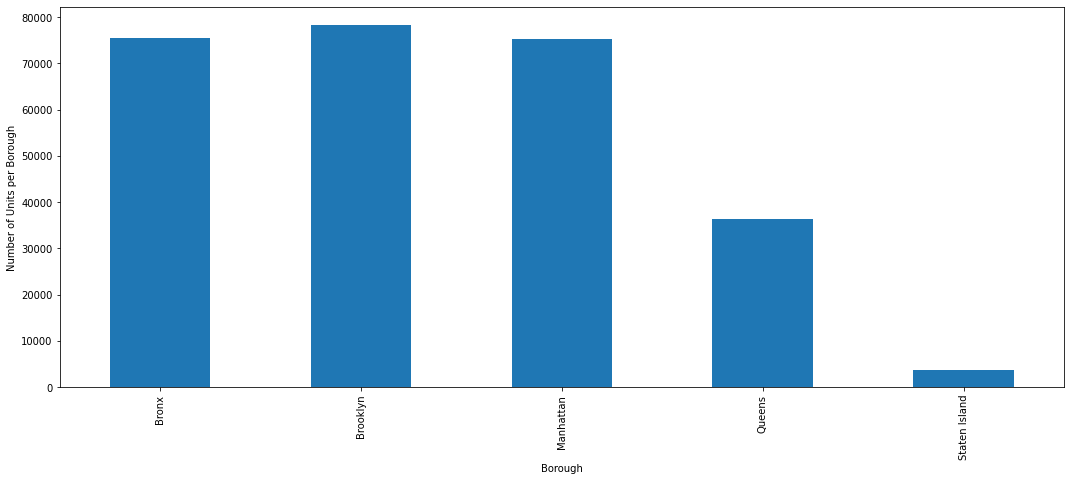

In [ ]:
boro_group['Total Units'].sum().plot(kind = "bar")
plt.ylabel('Number of Units per Borough')
plt.rcParams['figure.figsize'] = [18, 7]

Prints the total units classified as 'Very Low Income Units' per borough and then plots these totals.

Queens Very Low Income Units: 14486
Brooklyn Very Low Income Units: 14486
Bronx Very Low Income Units: 14486
Staten Island Very Low Income Units: 14486
Manhattan Very Low Income Units: 14486


Text(0, 0.5, 'Number of Very Low Income Units per Borough')

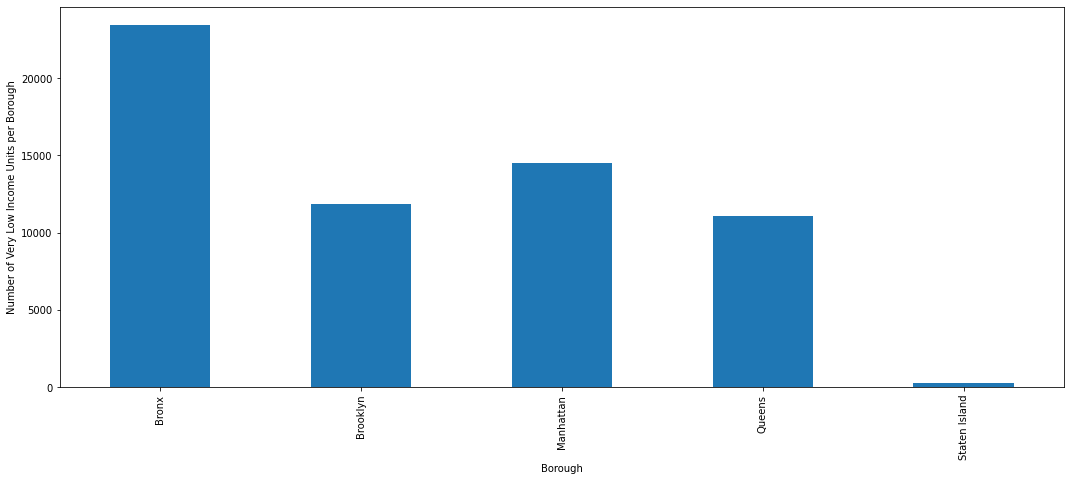

In [ ]:
for i in ('Queens','Brooklyn', 'Bronx', 'Staten Island', 'Manhattan'):
   print(i,"Very Low Income Units:",b['Very Low Income Units'].sum())
boro_group["Very Low Income Units"].sum().plot(kind="bar")
plt.ylabel('Number of Very Low Income Units per Borough')

Creates a group from the dataset called "Queens" and then finds the sum of units for each unit type for this borough.

In [ ]:
Queens=boro_group.get_group('Queens')
queens_ex=Queens["Extremely Low Income Units"].sum()
queens_v=Queens["Very Low Income Units"].sum()
queens_l=Queens["Low Income Units"].sum()
queens_mod=Queens["Moderate Income Units"].sum()
queens_mid=Queens["Middle Income Units"].sum()
queens_ot=Queens["Other Income Units"].sum()


Creates a pie chart based on these total amounts and assigns percentages to these amounts.

Queens Units


Text(0.5, 1.0, 'Type of Units in Queens')

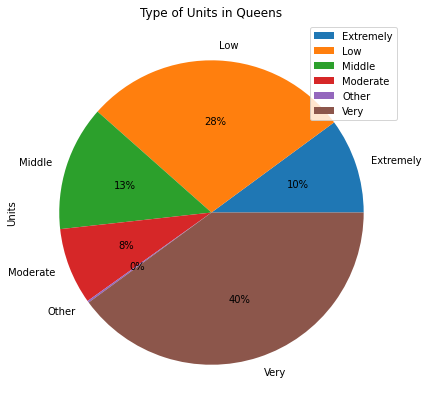

In [ ]:
print("Queens Units")
dataframe = pd.DataFrame({'UNITS': ['Extremely', 'Very', 'Low',"Moderate","Middle","Other"],
                          'Units': [queens_ex,queens_v,queens_l,queens_mod,queens_mid,queens_ot]})

# Plotting the pie chart for above dataframe
dataframe.groupby(['UNITS']).sum().plot(kind='pie', y='Units',autopct='%1.0f%%')
plt.title("Type of Units in Queens")

Uses the range function to repeat the earlier code for the other 4 boroughs.

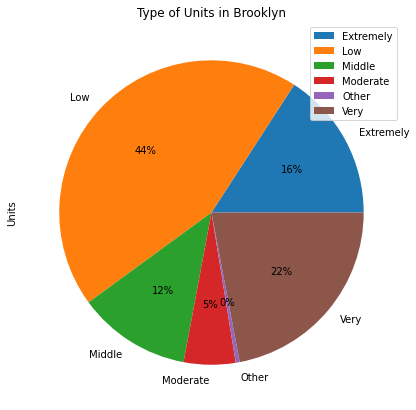

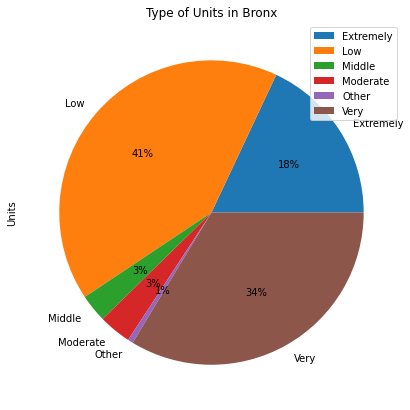

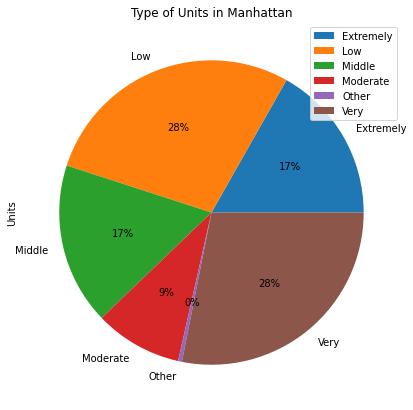

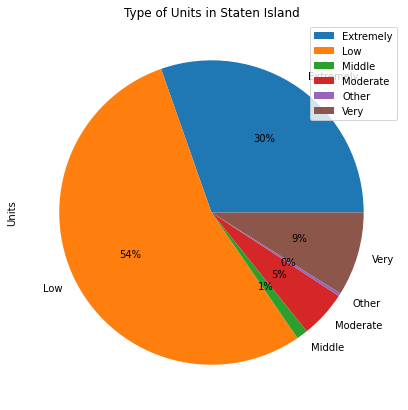

In [ ]:
from matplotlib.widgets import LockDraw
for i in ('Brooklyn','Bronx',"Manhattan","Staten Island"):
  b=boro_group.get_group(i)
  ex=b["Extremely Low Income Units"].sum()
  very=b["Very Low Income Units"].sum()
  low=b["Low Income Units"].sum()
  mod=b["Moderate Income Units"].sum()
  mid=b["Middle Income Units"].sum()
  ot=b["Other Income Units"].sum()
  #print(i,"Units")
  dataframe = pd.DataFrame({'UNITS': ['Extremely', 'Very', 'Low',"Moderate","Middle","Other"],
                          'Units': [ex,very,low,mod,mid,ot]})
  dataframe.groupby(['UNITS']).sum().plot(kind='pie', y='Units',autopct='%1.0f%%', title= "Type of Units in "+ i)


Finds the sum for each type of housing unit, based on # of bedrooms, in Queens and then makes a pie chart out of this data.

Queens # of Bedroom Units:


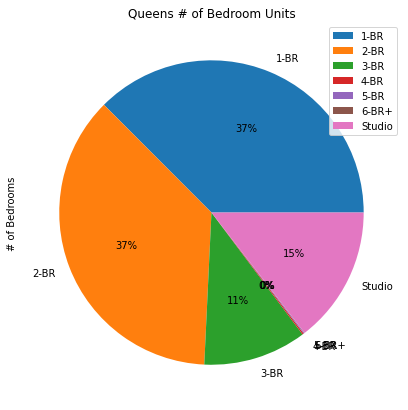

In [ ]:
print("Queens # of Bedroom Units:")
studio=Queens['Studio Units'].sum()
one=Queens["1-BR Units"].sum()
two=Queens["2-BR Units"].sum()
three=Queens["3-BR Units"].sum()
four=Queens["4-BR Units"].sum()
five=Queens["5-BR Units"].sum()
six=Queens["6-BR+ Units"].sum()
dataframe = pd.DataFrame({'UNIT Types': ['Studio','1-BR', '2-BR', '3-BR',"4-BR","5-BR","6-BR+"],
                          '# of Bedrooms': [studio,one,two,three,four,five,six]})
dataframe.groupby(['UNIT Types']).sum().plot(kind='pie', y='# of Bedrooms',autopct='%1.0f%%', title='Queens # of Bedroom Units')

Uses the range function to repeat the earlier code for the other 4 boroughs.

Brooklyn
Bronx
Manhattan
Staten Island


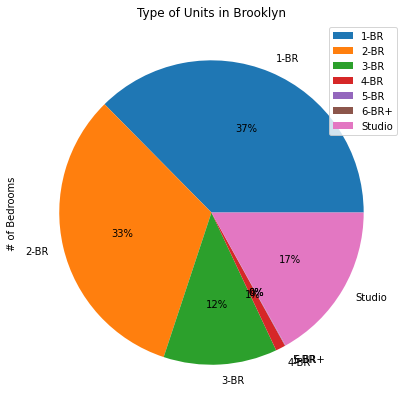

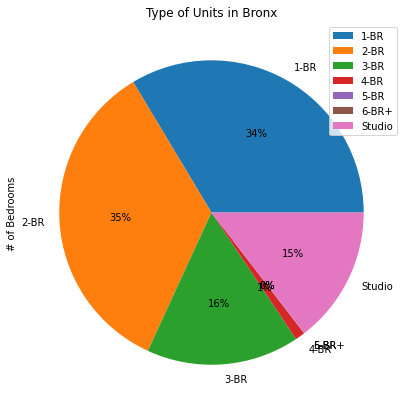

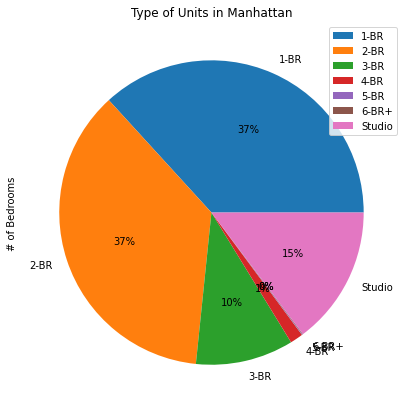

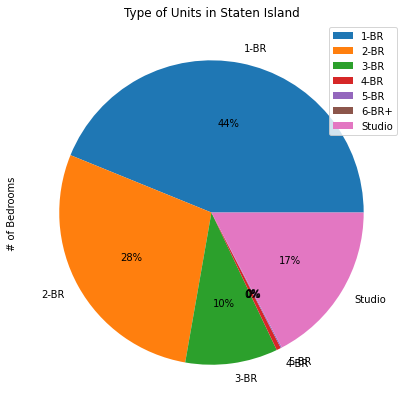

In [ ]:
for i in("Brooklyn","Bronx","Manhattan","Staten Island"):
   print(i)
   b=boro_group.get_group(i)
   studio=b['Studio Units'].sum()
   one=b["1-BR Units"].sum()
   two=b["2-BR Units"].sum()
   three=b["3-BR Units"].sum()
   four=b["4-BR Units"].sum()
   five=b["5-BR Units"].sum()
   six=b["6-BR+ Units"].sum()
   dataframe = pd.DataFrame({'UNIT Types': ['Studio','1-BR', '2-BR', '3-BR',"4-BR","5-BR","6-BR+"],
                          '# of Bedrooms': [studio,one,two,three,four,five,six]})
   dataframe.groupby(['UNIT Types']).sum().plot(kind='pie', y='# of Bedrooms',autopct='%1.0f%%', title= "Type of Units in "+ i)

Counts the amount of "New Construction" and "Preservation" housing projects per borough and then makes a bar chart for these values.

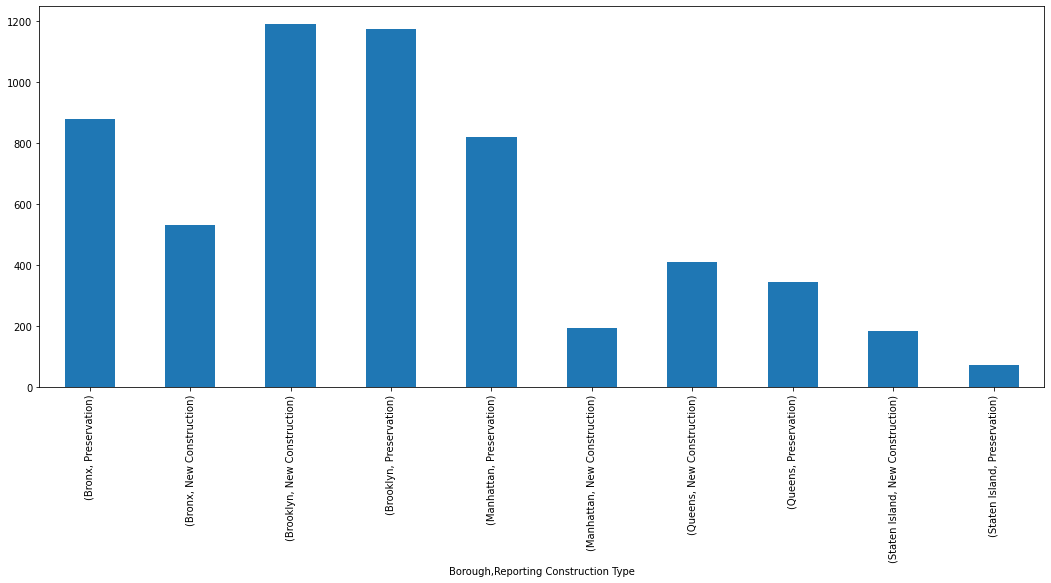

In [ ]:
boro_group['Reporting Construction Type'].value_counts().plot(kind = "bar")

Counts the amount of "Non Prevailing Wage Status" and "Prevailing Wage Status" housing projects per borough and then makes a bar chart for these values.

Text(0, 0.5, 'Number of Buildngs')

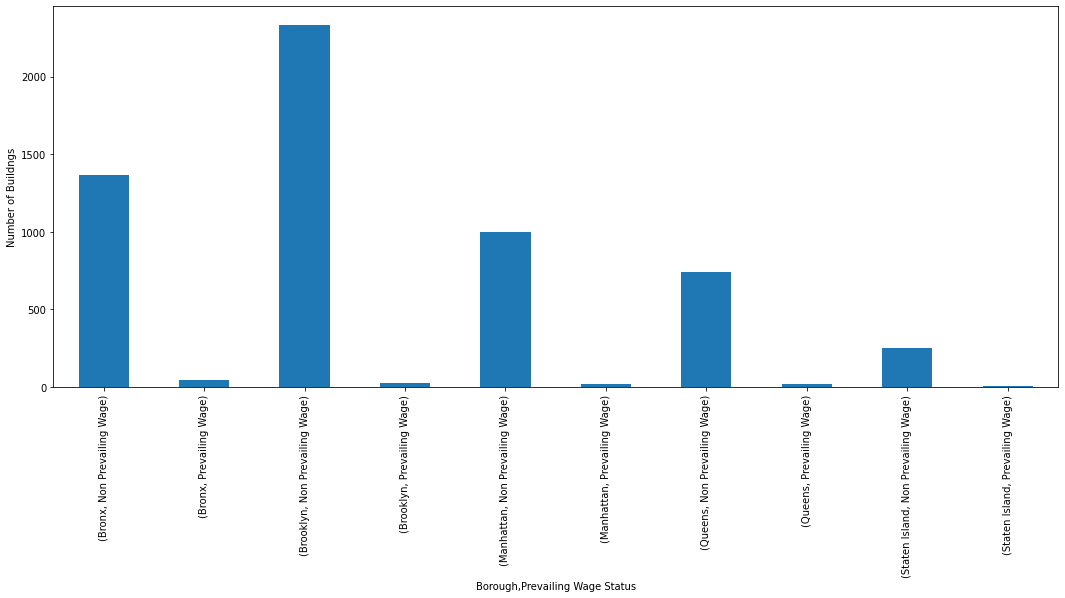

In [ ]:
boro_group['Prevailing Wage Status'].value_counts().plot.bar()
#label the y-axis
plt.ylabel('Number of Buildngs')

# Neighborhood Analysis

In [ ]:
#removes all other boroughs from the table and rows with no zip codes

onlyQ = affordable[affordable['Borough'] != "Queens" ].index
affordable.drop(onlyQ, inplace = True)

pc = affordable[affordable['Postcode'] == 0 ].index
affordable.drop(pc, inplace = True)

affordable

,Project ID,Project Name,Project Start Date,Project Completion Date,Number,Street,Borough,Postcode,Latitude,Longitude,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
24,67201,HABITAT NET ZERO,02/23/2022,NaN,126-01,116 AVENUE,Queens,11420.0,40.677051,-73.812475,...,1,0,0,0,0,0,0,1,1,1
25,67201,HABITAT NET ZERO,02/23/2022,NaN,114-11,130 STREET,Queens,11420.0,40.680889,-73.811415,...,0,0,1,0,0,0,0,1,1,1
26,67201,HABITAT NET ZERO,02/23/2022,NaN,133-24,135 PLACE,Queens,11420.0,40.668790,-73.802653,...,0,1,0,0,0,0,0,1,1,1
27,67201,HABITAT NET ZERO,02/23/2022,NaN,106-10,215 STREET,Queens,11429.0,40.710561,-73.743468,...,0,0,0,1,0,0,0,1,1,1
28,67201,HABITAT NET ZERO,02/23/2022,NaN,142-06,FOCH BOULEVARD,Queens,11436.0,40.678750,-73.799426,...,0,1,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5331,55511,Arverne/Nordak,09/23/2014,06/28/2019,353,BEACH 57 STREET,Queens,11692.0,40.593738,-73.787140,...,0,0,0,0,0,343,0,343,343,343
5401,50495,Calvary.112-02 Guy Brewer Boulevard,08/01/2014,06/15/2016,162-25,112 ROAD,Queens,11433.0,40.689767,-73.786563,...,20,0,0,0,0,0,53,0,53,53
5477,52182,DANIEL GILMARTIN HDFC,06/27/2014,06/27/2014,53-11,99 STREET,Queens,11368.0,40.739992,-73.860920,...,0,0,0,0,0,0,151,0,151,151
5712,48879,Vesta Steinway,03/12/2014,01/31/2017,19-73,38 STREET,Queens,11105.0,40.777568,-73.901635,...,30,6,0,0,0,0,84,0,84,84


**Astoria**

In [ ]:
#zipcode
astoria = affordable.query("Postcode >= 11101 & Postcode <= 11106 & Postcode != 11104")

astoria

,Project ID,Project Name,Project Start Date,Project Completion Date,Number,Street,Borough,Postcode,Latitude,Longitude,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
108,71868,27-14 39TH AVENUE APARTMENTS,12/22/2021,NaN,27-14,39 AVENUE,Queens,11101.0,40.754232,-73.935821,...,0,0,0,0,0,0,2,0,2,6
158,72222,THE ARIEL 44-46 PURVES STREET,12/07/2021,NaN,44-46,PURVES STREET,Queens,11101.0,40.746717,-73.941018,...,1,0,0,0,0,0,15,0,15,49
166,72228,27-10 37TH AVENUE,12/02/2021,NaN,27-10,37 AVENUE,Queens,11101.0,40.756492,-73.933827,...,0,0,0,0,0,0,3,0,3,10
265,72254,23-29 30TH DRIVE APARTMENTS,10/14/2021,NaN,23-29,30 DRIVE,Queens,11102.0,40.767476,-73.927502,...,0,0,0,0,0,0,3,0,3,8
278,71871,30-79 31ST STREET APARTMENTS,10/04/2021,NaN,30-79,31 STREET,Queens,11102.0,40.764917,-73.922985,...,0,0,0,0,0,0,3,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,58799,HALLETTS POINT ONE (HLP1),06/09/2016,12/30/2019,26-01,1 STREET,Queens,11102.0,40.776834,-73.935500,...,24,1,0,0,0,0,81,0,81,405
4361,65096,21-03 46 AVENUE APARTMENTS,01/07/2016,11/30/2016,21-03,46 AVENUE,Queens,11101.0,40.745943,-73.947844,...,0,0,0,0,0,0,2,0,2,8
4630,52127,Vernon Tower,10/23/2015,08/07/2019,31-43,VERNON BOULEVARD,Queens,11106.0,40.768293,-73.935855,...,11,0,0,0,0,0,21,0,21,103
4700,59538,Fleet Project 43-25 Hunter Street (20150032),07/16/2015,01/24/2017,43-25,HUNTER STREET,Queens,11101.0,40.747892,-73.942595,...,34,0,0,0,0,0,195,0,195,974


Astoria has 8335 total units


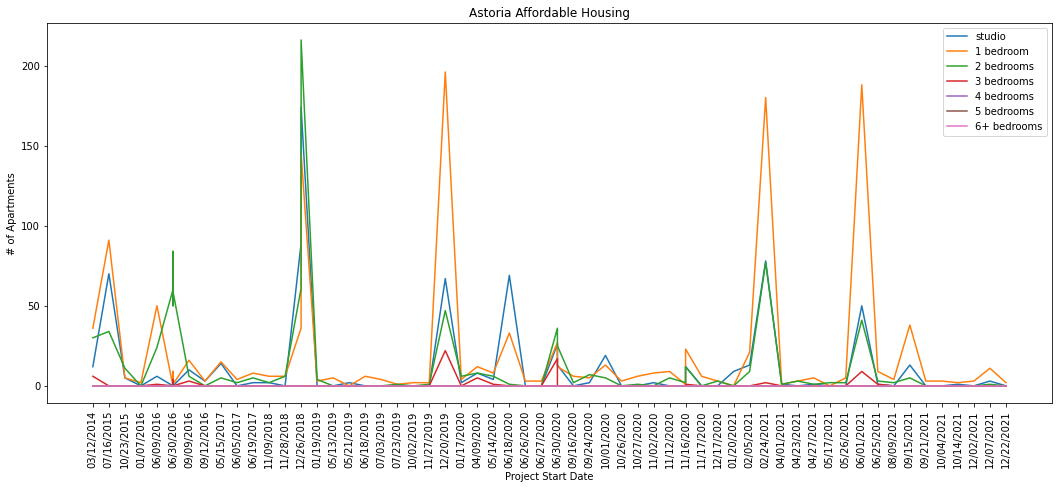

In [ ]:
plt.figure()
studio = plt.plot(astoria["Project Start Date"],astoria["Studio Units"],label='studio')
one = plt.plot(astoria["Project Start Date"],astoria["1-BR Units"],label='1 bedroom')
two = plt.plot(astoria["Project Start Date"],astoria["2-BR Units"],label='2 bedrooms')
three = plt.plot(astoria["Project Start Date"],astoria["3-BR Units"],label='3 bedrooms')
four = plt.plot(astoria["Project Start Date"],astoria["4-BR Units"],label='4 bedrooms')
five = plt.plot(astoria["Project Start Date"],astoria["5-BR Units"],label='5 bedrooms')
six = plt.plot(astoria["Project Start Date"],astoria["6-BR+ Units"],label='6+ bedrooms')
#plt.xticks(np.arange(2022, 1900, step=100))
plt.xticks(rotation ='vertical')
plt.gca().invert_xaxis()

plt.legend()
plt.xlabel("Project Start Date")
plt.ylabel("# of Apartments")
plt.title("Astoria Affordable Housing")

plt.rcParams['figure.figsize'] = [18, 7]

print("Astoria has", astoria['Total Units'].sum(), "total units")

**Elmhurst**

In [ ]:
#zipcode
elmhurst = affordable.query("Postcode >= 11368 & Postcode <= 11381")

elmhurst


,Project ID,Project Name,Project Start Date,Project Completion Date,Number,Street,Borough,Postcode,Latitude,Longitude,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
53,72200,95-01 37TH AVENUE APARTMENTS,01/28/2022,NaN,95-01,37 AVENUE,Queens,11372.0,40.751099,-73.872154,...,7,0,0,0,0,0,14,0,14,44
63,68962,ELMCOR. 104-10 & 12 NORTHERN BLVD,01/13/2022,NaN,104-10,NORTHERN BOULEVARD,Queens,11368.0,40.757694,-73.864417,...,0,0,0,0,0,0,30,0,30,30
109,71869,41-30 66TH STREET APARTMENTS,12/22/2021,NaN,41-30,66 STREET,Queens,11377.0,40.744090,-73.897985,...,0,0,0,0,0,0,5,0,5,14
121,72213,55-44 97 PLACE APARTMENTS,12/20/2021,NaN,55-44,97 PLACE,Queens,11368.0,40.738592,-73.863658,...,3,0,0,0,0,0,3,0,3,10
165,72227,SILVER POINT 43-20 52ND STREET APARTMENTS,12/02/2021,NaN,43-20,52 STREET,Queens,11377.0,40.743731,-73.912584,...,5,0,0,0,0,0,5,0,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,50424,SOUTHEASTERN QUEENS VACANT HOMES-CLUSTER I,10/19/2016,03/27/2018,32-10,102 STREET,Queens,11369.0,40.758973,-73.866840,...,0,1,0,0,0,0,0,1,1,1
3868,52999,HANAC. 54-25 101 ST. CORONA SENIOR RESIDENCE,08/05/2016,08/23/2018,54-25,101 STREET,Queens,11368.0,40.739797,-73.858846,...,1,0,0,0,0,0,68,0,68,68
5097,50810,ALBERTA ALSTON HOUSE,12/22/2014,NaN,52-09,99 STREET,Queens,11368.0,40.740643,-73.861298,...,0,0,0,0,0,0,151,0,151,151
5477,52182,DANIEL GILMARTIN HDFC,06/27/2014,06/27/2014,53-11,99 STREET,Queens,11368.0,40.739992,-73.860920,...,0,0,0,0,0,0,151,0,151,151


Text(0.5, 1.0, 'Elmhurst Affordable Housing')

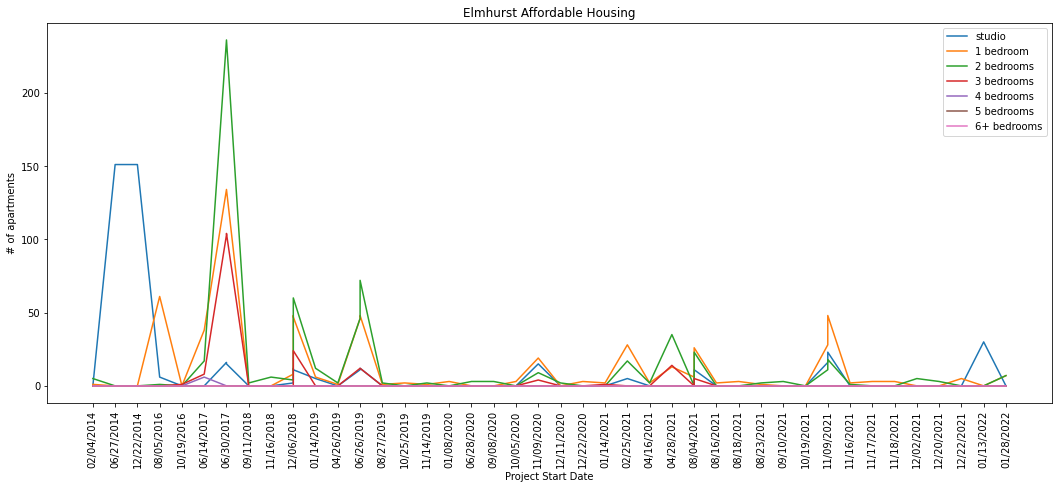

In [ ]:
apartments = elmhurst["2-BR Units"]+elmhurst["3-BR Units"]+elmhurst["4-BR Units"]+elmhurst["5-BR Units"]+elmhurst["6-BR+ Units"]
plt.figure()
studio = plt.plot(elmhurst["Project Start Date"],elmhurst["Studio Units"],label='studio')
one = plt.plot(elmhurst["Project Start Date"],elmhurst["1-BR Units"],label='1 bedroom')
two = plt.plot(elmhurst["Project Start Date"],elmhurst["2-BR Units"],label='2 bedrooms')
three = plt.plot(elmhurst["Project Start Date"],elmhurst["3-BR Units"],label='3 bedrooms')
four = plt.plot(elmhurst["Project Start Date"],elmhurst["4-BR Units"],label='4 bedrooms')
five = plt.plot(elmhurst["Project Start Date"],elmhurst["5-BR Units"],label='5 bedrooms')
six = plt.plot(elmhurst["Project Start Date"],elmhurst["6-BR+ Units"],label='6+ bedrooms')
#plt.xticks(np.arange(2022, 1900))
plt.xticks(rotation ='vertical')
plt.gca().invert_xaxis()
plt.legend()
plt.xlabel("Project Start Date")
plt.ylabel("# of apartments")
plt.title("Elmhurst Affordable Housing")

**Flushing**

In [ ]:
#zipcode
flushing = affordable.query("Postcode >= 11354 & Postcode <= 11358")

flushing

,Project ID,Project Name,Project Start Date,Project Completion Date,Number,Street,Borough,Postcode,Latitude,Longitude,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
678,71107,36-23 172ND STREET APARTMENTS,05/17/2021,NaN,36-23,172 STREET,Queens,11358.0,40.762772,-73.794213,...,3,0,0,0,0,0,6,0,6,18
1231,69957,THE URBAN,04/13/2020,NaN,144-74,NORTHERN BOULEVARD,Queens,11354.0,40.764711,-73.822928,...,10,0,0,0,0,0,31,0,31,103
2740,67308,168-05 DEPOT ROAD,06/12/2018,02/12/2019,168-05,DEPOT ROAD,Queens,11358.0,40.761491,-73.798000,...,2,0,0,0,0,0,3,0,3,7
3447,63859,140-26 FRANKLIN AVENUE HPO FY17,06/22/2017,06/22/2017,140-26,FRANKLIN AVENUE,Queens,11355.0,40.756088,-73.823781,...,12,0,0,0,0,0,54,0,54,54
3655,58625,ONE FLUSHING,12/29/2016,03/25/2020,133-45,41 AVENUE,Queens,11355.0,40.757855,-73.830252,...,57,25,0,0,0,0,232,0,232,232


Flushing has a total of 414 units.



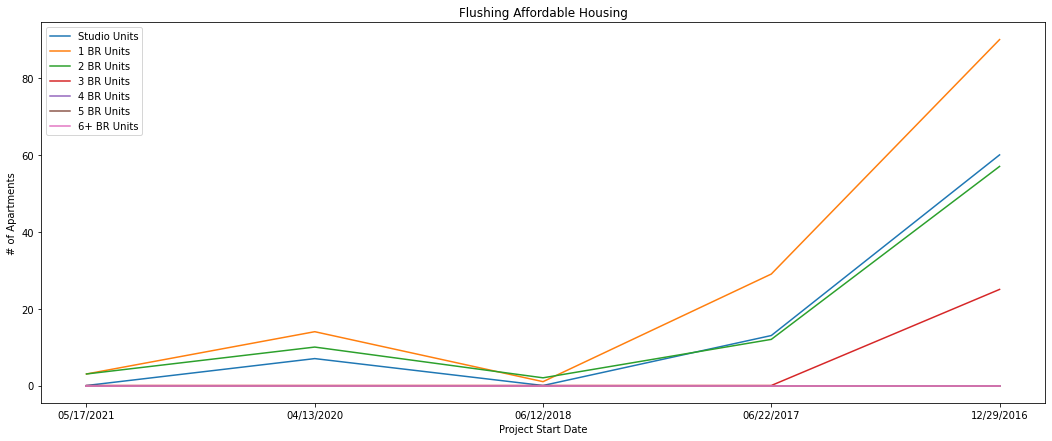

In [ ]:
print("Flushing has a total of", flushing['Total Units'].sum(),"units.")
flushing
print()

apartments = flushing["Studio Units"]+flushing["1-BR Units"]+flushing["2-BR Units"]+flushing["3-BR Units"]+flushing["4-BR Units"]+flushing["5-BR Units"]+flushing["6-BR+ Units"]
plt.figure()
studio = plt.plot(flushing["Project Start Date"],flushing["Studio Units"],label='Studio Units')
one = plt.plot(flushing["Project Start Date"],flushing["1-BR Units"],label='1 BR Units')
two = plt.plot(flushing["Project Start Date"],flushing["2-BR Units"],label='2 BR Units')
three = plt.plot(flushing["Project Start Date"],flushing["3-BR Units"],label='3 BR Units')
four = plt.plot(flushing["Project Start Date"],flushing["4-BR Units"],label='4 BR Units')
five = plt.plot(flushing["Project Start Date"],flushing["5-BR Units"],label='5 BR Units')
six = plt.plot(flushing["Project Start Date"],flushing["6-BR+ Units"],label='6+ BR Units')
plt.xlabel("Project Start Date")
plt.ylabel("# of Apartments")
plt.title("Flushing Affordable Housing")
plt.xticks()
plt.legend()

**Jackson** **Heights**

In [ ]:
#jackson
jackson = affordable.query("Postcode==11372")
jackson

,Project ID,Project Name,Project Start Date,Project Completion Date,Number,Street,Borough,Postcode,Latitude,Longitude,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
53,72200,95-01 37TH AVENUE APARTMENTS,01/28/2022,NaN,95-01,37 AVENUE,Queens,11372.0,40.751099,-73.872154,...,7,0,0,0,0,0,14,0,14,44
950,70511,ROOSEVELT PARC APARTMENTS,11/09/2020,NaN,37-46,72 STREET,Queens,11372.0,40.747525,-73.893776,...,9,4,0,0,0,0,47,0,47,154
2353,68054,37-49 81ST STREET CONDOMINIUMS,11/16/2018,01/07/2019,37-49,81 STREET,Queens,11372.0,40.749304,-73.885165,...,6,0,0,0,0,0,0,6,6,28


Groups the data by the postcode '11372', names this variable jackson to show it represents Jackson Heights, and then prints all the data with this postcode.

In [ ]:
mean=affordable.groupby('Postcode')['Total Units'].sum().mean()
print("Mean of Total Units per Postcode:",mean)

Mean of Total Units per Postcode: 819.55


Finds the mean of total units per postcode.

In [ ]:
print("Jackson Total Units:",jackson['Total Units'].sum())
print("Jackson",jackson.groupby('1-BR Units')['Total Units'].sum())
print("Jackson",jackson.groupby('2-BR Units')['Total Units'].sum())
print("Jackson",jackson.groupby('3-BR Units')['Total Units'].sum())
print("Jackson",jackson.groupby('4-BR Units')['Total Units'].sum())
print("Jackson",jackson.groupby('5-BR Units')['Total Units'].sum())
print("Jackson",jackson.groupby('6-BR+ Units')['Total Units'].sum())
print("Jackson",jackson.groupby('Counted Rental Units')['Total Units'].sum())

Jackson Total Units: 226
Jackson 1-BR Units
0      28
7      44
19    154
Name: Total Units, dtype: int64
Jackson 2-BR Units
6     28
7     44
9    154
Name: Total Units, dtype: int64
Jackson 3-BR Units
0     72
4    154
Name: Total Units, dtype: int64
Jackson 4-BR Units
0    226
Name: Total Units, dtype: int64
Jackson 5-BR Units
0    226
Name: Total Units, dtype: int64
Jackson 6-BR+ Units
0    226
Name: Total Units, dtype: int64
Jackson Counted Rental Units
0      28
14     44
47    154
Name: Total Units, dtype: int64


Finds the total units in Jackson and then the total per type of housing unit based on # of bedrooms.

<Figure size 1296x504 with 0 Axes>

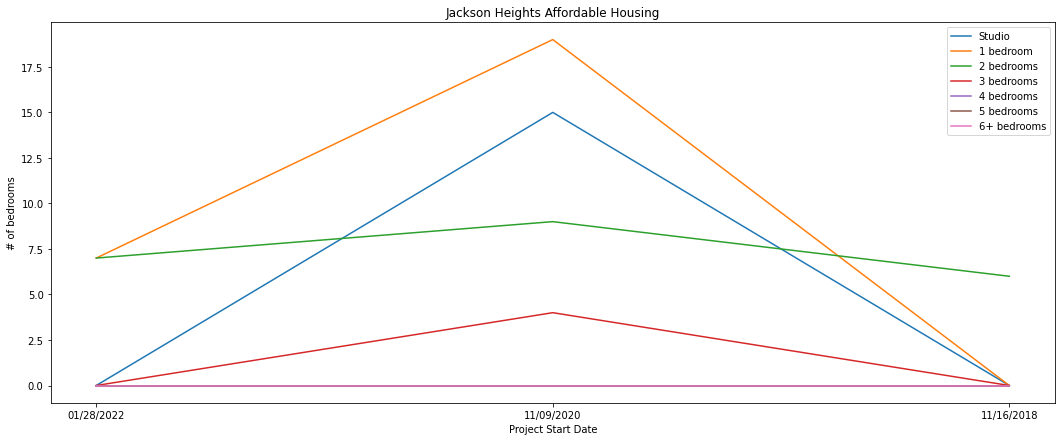

<Figure size 1296x504 with 0 Axes>

In [ ]:
studio=plt.plot(jackson["Project Start Date"],jackson["Studio Units"],label='Studio')
one = plt.plot(jackson["Project Start Date"],jackson["1-BR Units"],label='1 bedroom')
two = plt.plot(jackson["Project Start Date"],jackson["2-BR Units"],label='2 bedrooms')
three = plt.plot(jackson["Project Start Date"],jackson["3-BR Units"],label='3 bedrooms')
four = plt.plot(jackson["Project Start Date"],jackson["4-BR Units"],label='4 bedrooms')
five = plt.plot(jackson["Project Start Date"],jackson["5-BR Units"],label='5 bedrooms')
six = plt.plot(jackson["Project Start Date"],jackson["6-BR+ Units"],label='6+ bedrooms')
plt.xticks()
plt.legend()
plt.xlabel("Project Start Date")
plt.ylabel("# of bedrooms")
plt.title("Jackson Heights Affordable Housing")
plt.figure()


Makes variables representing the different kinds of housing units, based on # of bedrooms, in Jackson Heights and then plots a graph against the 'Project Start Date' value to show what types of units are being built and when they were being built in this neighborhood.

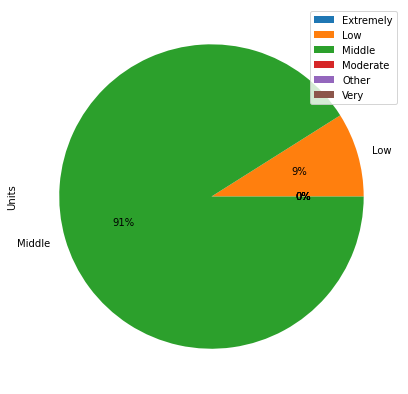

In [ ]:
ex=jackson["Extremely Low Income Units"].sum()
very=jackson["Very Low Income Units"].sum()
low=jackson["Low Income Units"].sum()
mod=jackson["Moderate Income Units"].sum()
mid=jackson["Middle Income Units"].sum()
ot=jackson["Other Income Units"].sum()
dataframe = pd.DataFrame({'UNITS': ['Extremely', 'Very', 'Low',"Moderate","Middle","Other"],
                          'Units': [ex,very,low,mod,mid,ot]})
dataframe.groupby(['UNITS']).sum().plot(kind='pie', y='Units',autopct='%1.0f%%')

Finds the amount of units based on classification of income for Jackson Heights and then makes a pie chart for these values.

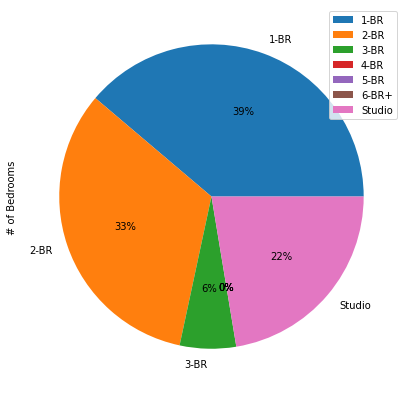

In [ ]:
studio=jackson['Studio Units'].sum()
one=jackson["1-BR Units"].sum()
two=jackson["2-BR Units"].sum()
three=jackson["3-BR Units"].sum()
four=jackson["4-BR Units"].sum()
five=jackson["5-BR Units"].sum()
six=jackson["6-BR+ Units"].sum()
dataframe = pd.DataFrame({'UNIT Types': ['Studio','1-BR', '2-BR', '3-BR',"4-BR","5-BR","6-BR+"],
                          '# of Bedrooms': [studio,one,two,three,four,five,six]})
dataframe.groupby(['UNIT Types']).sum().plot(kind='pie', y='# of Bedrooms',autopct='%1.0f%%')

Finds the amount of units based on #of bedrooms for Jackson Heights and then makes a pie chart for these values.

Order: elmhurst, astoria, flushing


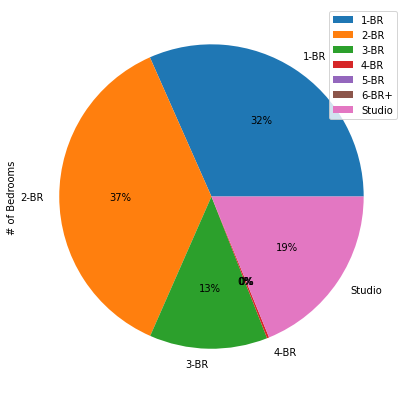

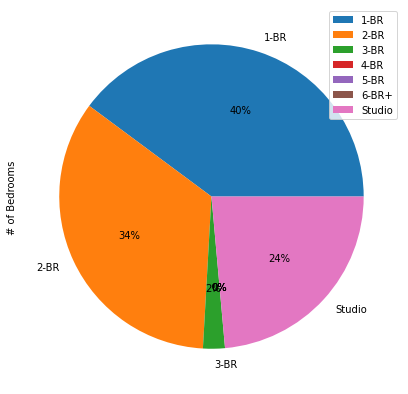

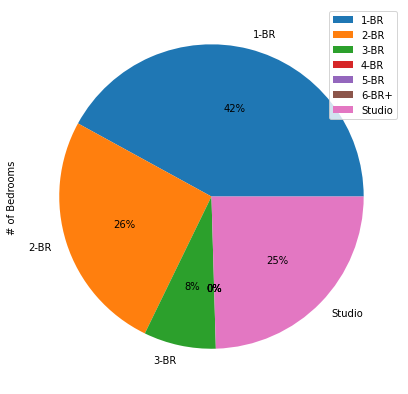

In [ ]:
print("Order: elmhurst, astoria, flushing")
for i in(elmhurst,astoria,flushing):
   studio=i['Studio Units'].sum()
   one=i["1-BR Units"].sum()
   two=i["2-BR Units"].sum()
   three=i["3-BR Units"].sum()
   four=i["4-BR Units"].sum()
   five=i["5-BR Units"].sum()
   six=i["6-BR+ Units"].sum()
   dataframe = pd.DataFrame({'UNIT Types': ['Studio','1-BR', '2-BR', '3-BR',"4-BR","5-BR","6-BR+"],
                          '# of Bedrooms': [studio,one,two,three,four,five,six]})
   dataframe.groupby(['UNIT Types']).sum().plot(kind='pie', y='# of Bedrooms',autopct='%1.0f%%')


Finds the amout of units based on #of bedrooms for Elmhurst, Astoria, and Flushing, and then makes a pie chart for these values.

Order: elmhurst, astoria, flushing


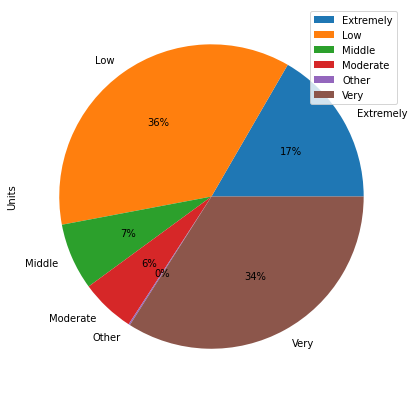

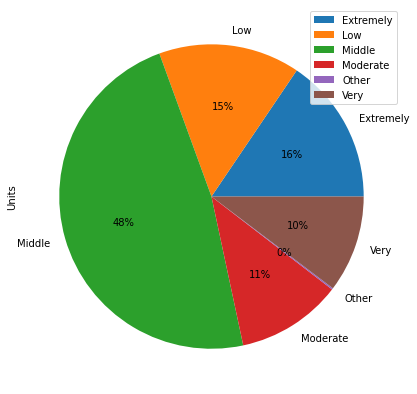

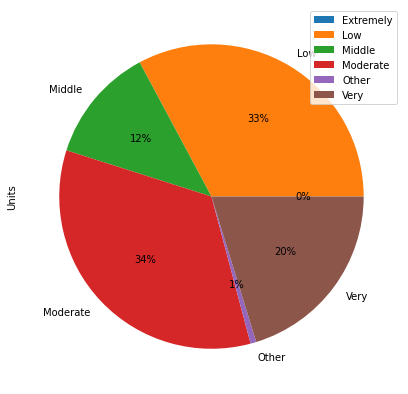

In [ ]:
print("Order: elmhurst, astoria, flushing")
for i in(elmhurst,astoria,flushing):
  ex=i["Extremely Low Income Units"].sum()
  very=i["Very Low Income Units"].sum()
  low=i["Low Income Units"].sum()
  mod=i["Moderate Income Units"].sum()
  mid=i["Middle Income Units"].sum()
  ot=i["Other Income Units"].sum()
  dataframe = pd.DataFrame({'UNITS': ['Extremely', 'Very', 'Low',"Moderate","Middle","Other"],
                          'Units': [ex,very,low,mod,mid,ot]})
  dataframe.groupby(['UNITS']).sum().plot(kind='pie', y='Units',autopct='%1.0f%%')

Finds the amount of units based on classification of income for Elmhurst, Astoria, and Flushing, and then makes a pie chart for these values.